In [1]:
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split
import pandas as pd
from tensorflow.keras.callbacks import ModelCheckpoint
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/wine.csv', header=None)
X = df.iloc[:, :12]
y = df.iloc[:, 12]
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, shuffle=True)
model = models.Sequential()
model.add(layers.Dense(30, input_dim=12, activation='relu'))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [3]:
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, verbose=0,
                   validation_split=0.25,)

C:\Users\BIT\miniconda3\envs\ml-env\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


In [5]:
hist = pd.DataFrame(history.history)
hist.head()

,loss,accuracy,val_loss,val_accuracy
0,8.384998,0.240185,5.507782,0.252308
1,3.804385,0.240185,1.696500,0.252308
2,0.955887,0.552733,0.388810,0.843846
3,0.330455,0.872209,0.318457,0.873077
4,0.290935,0.891198,0.299775,0.883846


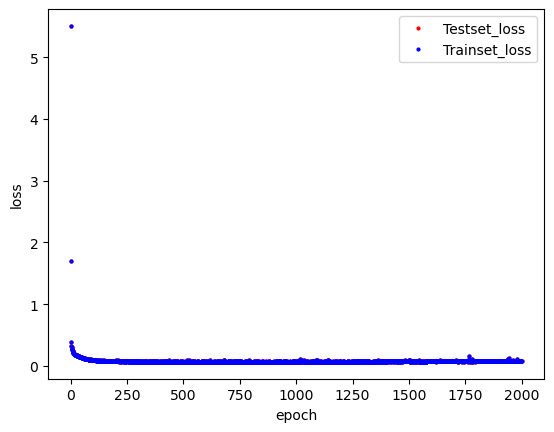

In [6]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss = hist['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss = hist['loss']

# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_vloss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()